<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_tf_eager.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_tf_eager.ipynb)


In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

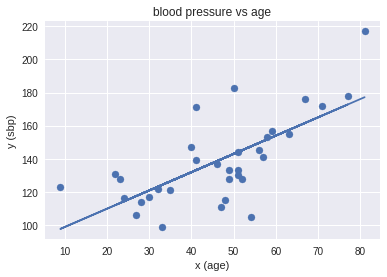

intercept =  87.67143 solpe =  1.1050216


In [3]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

## TF Eager

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [0]:
def loss(a, b):
  y_hat = a*x + b
  return tf.reduce_mean((y_hat - y)**2)

In [6]:
loss(tfe.Variable(3), tfe.Variable(140))

<tf.Tensor: id=27, shape=(), dtype=int32, numpy=20826>

In [0]:
grad_f = tfe.gradients_function(loss)

In [8]:
grad_a, grad_b = grad_f(tfe.Variable(3.0), tfe.Variable(140.0))
print(grad_a.numpy())
print(grad_b.numpy())

13894.788
279.45456


In [9]:
a = tfe.Variable(3.0)
b = tfe.Variable(140.0)
with tf.GradientTape() as tape:
  loss_val = loss(a,b)
  print("Loss at ", loss_val)
  grad_a, grad_b = tape.gradient(loss_val, [a,b])
  print(grad_a, grad_b)

Loss at  tf.Tensor(20826.092, shape=(), dtype=float32)
tf.Tensor(13894.788, shape=(), dtype=float32) tf.Tensor(279.45456, shape=(), dtype=float32)


In [11]:
a  = tfe.Variable(3.0) #We can optimize them later
b = tfe.Variable(140.0)
eps = 0.0004
for i in range(80000):
  with tf.GradientTape() as tape: #Record the gradients from now on
    y_hat = a*x + b
    loss = tf.reduce_mean((y_hat - y)**2)   
    grad_a, grad_b  = tape.gradient(loss, [a,b])
    a = tfe.Variable(a - eps * grad_a)
    b = tfe.Variable(b - eps * grad_b)

    if (i % 5000 == 0):
      print(a.numpy(),b.numpy(), "\t", grad_a.numpy(), grad_b.numpy(), "\t\t", loss.numpy())


-2.5579152 139.88821 	 13894.788 279.45456 		 20826.092
0.4584417 121.21216 	 -0.1430664 7.4400373 		 474.03043
0.69010633 109.19477 	 -0.091552734 4.7743335 		 400.60428
0.83876675 101.483154 	 -0.059555054 3.0637195 		 370.36835
0.9341623 96.5346 	 -0.038116455 1.966033 		 357.9175
0.9953787 93.35905 	 -0.023757935 1.2616434 		 352.7903
1.0346644 91.321144 	 -0.01524353 0.80959034 		 350.67886
1.0598692 90.01367 	 -0.009796143 0.5195639 		 349.80957
1.0760521 89.1742 	 -0.0069274902 0.3333373 		 349.45148
1.0864205 88.63634 	 -0.003692627 0.21404529 		 349.30426
1.0930761 88.2911 	 -0.0031433105 0.13744712 		 349.2435
1.0973638 88.068665 	 -0.001373291 0.08812356 		 349.21844
1.1000648 87.928566 	 -0.0018463135 0.057024956 		 349.20816
1.1018075 87.838165 	 -0.0013885498 0.03697443 		 349.20395
1.1029078 87.78108 	 -0.0007171631 0.024318933 		 349.20215
1.1036431 87.742935 	 -0.0004119873 0.015861034 		 349.20142


In [12]:
print(a.numpy(), b.numpy(), loss.numpy())
# optimal vlue for a:   1.1050216
# optimal vlue for b:   87.67143
# minimal loss:         349.2007871685606

1.1041983 87.71413 349.20108
